In [131]:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown
from ucimlrepo import fetch_ucirepo 

import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

https://archive.ics.uci.edu/dataset/2/adult

# Project Summary

Provide a clear explanation of:
  1. What this project is about
     - Clearly state the ML type (supervised/unsupervised)
  2. The goal of the project
     - E.g. why it’s important, what goal you want to achieve, or want to learn.

# Data Summary

Data Source:
1. Explain what the dataset is.
2. Identify where the data came from (using the APA format)
3. Explain how the dataset was gathered (via API, csv, etc.)

### Import Dataset

In [67]:
# Import dataset 
adult_dataset_dict = fetch_ucirepo(id=2)

# View raw dataset
df = adult_dataset_dict.data.original
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


### Data Description

In [38]:
# Display a table of the descriptions for each column
display(Markdown(adult_dataset_dict.variables.to_markdown()))

|    | name           | role    | type        | demographic     | description                                                                                                                                                                                                                                                                                                                                                                                                                     | units   | missing_values   |
|---:|:---------------|:--------|:------------|:----------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:--------|:-----------------|
|  0 | age            | Feature | Integer     | Age             | N/A                                                                                                                                                                                                                                                                                                                                                                                                                             |         | no               |
|  1 | workclass      | Feature | Categorical | Income          | Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.                                                                                                                                                                                                                                                                                                                          |         | yes              |
|  2 | fnlwgt         | Feature | Integer     |                 |                                                                                                                                                                                                                                                                                                                                                                                                                                 |         | no               |
|  3 | education      | Feature | Categorical | Education Level | Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.                                                                                                                                                                                                                                                                          |         | no               |
|  4 | education-num  | Feature | Integer     | Education Level |                                                                                                                                                                                                                                                                                                                                                                                                                                 |         | no               |
|  5 | marital-status | Feature | Categorical | Other           | Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.                                                                                                                                                                                                                                                                                                                      |         | no               |
|  6 | occupation     | Feature | Categorical | Other           | Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.                                                                                                                                                                                                       |         | yes              |
|  7 | relationship   | Feature | Categorical | Other           | Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.                                                                                                                                                                                                                                                                                                                                                             |         | no               |
|  8 | race           | Feature | Categorical | Race            | White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.                                                                                                                                                                                                                                                                                                                                                                    |         | no               |
|  9 | sex            | Feature | Binary      | Sex             | Female, Male.                                                                                                                                                                                                                                                                                                                                                                                                                   |         | no               |
| 10 | capital-gain   | Feature | Integer     |                 |                                                                                                                                                                                                                                                                                                                                                                                                                                 |         | no               |
| 11 | capital-loss   | Feature | Integer     |                 |                                                                                                                                                                                                                                                                                                                                                                                                                                 |         | no               |
| 12 | hours-per-week | Feature | Integer     |                 |                                                                                                                                                                                                                                                                                                                                                                                                                                 |         | no               |
| 13 | native-country | Feature | Categorical | Other           | United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands. |         | yes              |
| 14 | income         | Target  | Binary      | Income          | >50K, <=50K.                                                                                                                                                                                                                                                                                                                                                                                                                    |         | no               |

In [66]:
# Inspect column datatypes and size of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


> The dataset contains 15 columns and 48,842 rows of data.  

> Six columns are integer datatypes, and the other 9 columns are categorical datatypes (shown as "objects" above).

### Missing Values

In [70]:
# Calculate the count of missing values
df_missing = df.isna().sum()
df_missing[df_missing > 0]

workclass         963
occupation        966
native-country    274
dtype: int64

> It appears that the `workclass`, `occupation`, and `native-country` columns all contain missing values which will need to be imputed or rows dropped during preprocessing.

In [ ]:
# Filter the dataset to only the rows that have missing values in `workclass`, `occupation`, and `native-country` columns
df_missing_subset = df[(df['workclass'].isna()) | (df['occupation'].isna()) | (df['native-country'].isna())]
df_missing_subset

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32565,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
32567,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K.
32574,58,NaN,299831,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K.
32580,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,NaN,>50K.
32583,72,NaN,132015,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48769,21,NaN,212661,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
48800,73,NaN,144872,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,Canada,<=50K.
48812,81,NaN,26711,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,2936,0,20,United-States,<=50K.
48826,50,Local-gov,139347,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,NaN,>50K.


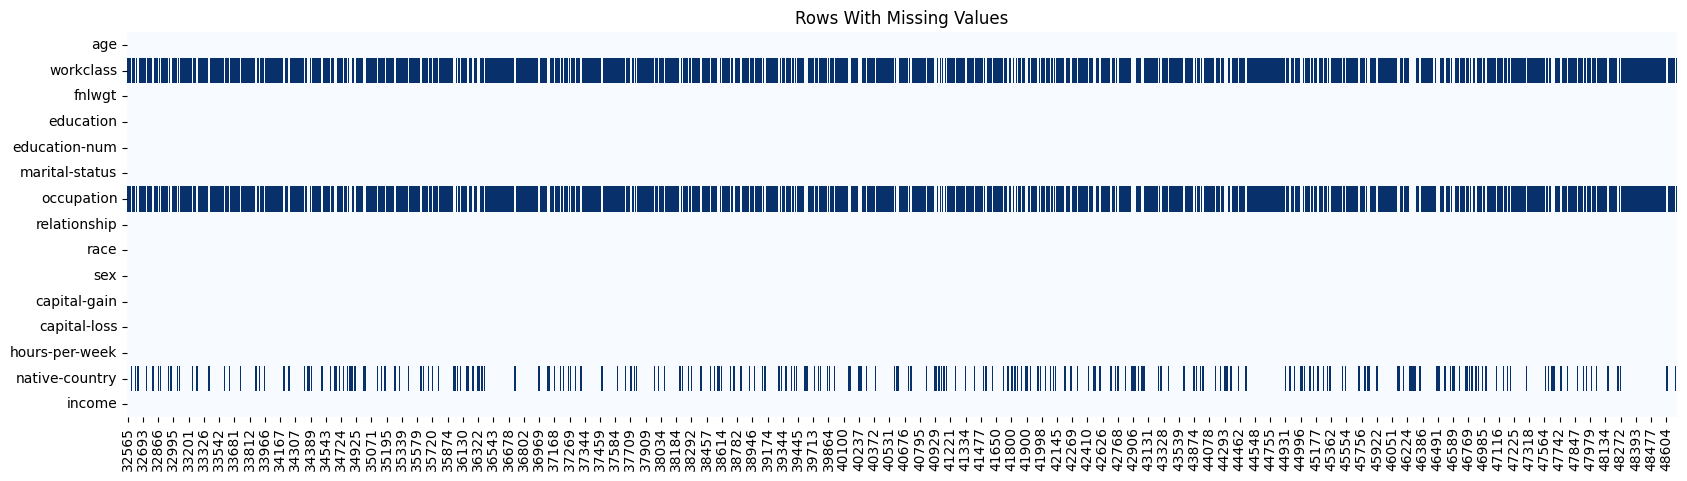

In [91]:
# Visualize the rows that have missing data
fig, ax = plt.subplots(figsize=(20,5))  
sns.heatmap(df_missing_subset.T.isna(), cmap='Blues', cbar=False)
plt.title('Rows With Missing Values')
plt.show()

> The `workclass` and `occupation` columns appear to have similar patterns of where the data is missing.

### Duplicate Values

In [ ]:
# Display first 10 rows wher duplicated values occur
df_duplicated = df[df.duplicated(keep=False)].sort_values(by=df.columns.to_list())
df_duplicated

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
36461,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K.
48521,18,Self-emp-inc,378036,12th,8,Never-married,Farming-fishing,Own-child,White,Male,0,0,10,United-States,<=50K.
17673,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
6990,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K
15189,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K
21490,19,Private,146679,Some-college,10,Never-married,Exec-managerial,Own-child,Black,Male,0,0,30,United-States,<=50K
3917,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K
31993,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,14,United-States,<=50K


> The dataset contains 57 rows that have duplicated values. Only the first occurance will be kept and the other duplicates will be dropped during pre-processing to ensure the model is not overfit.

### Define Numeric and Categorical Columns Groups

In [ ]:
# Define lists of the numeric and categorical column names
numeric_columns = df.select_dtypes(include=['int64']).columns.to_list()
categorical_columns = [col for col in df.columns if col not in numeric_columns]

# Display numeric and categorical columns as lists
print('Numeric Columns :', numeric_columns)
print('Categorical Columns :', categorical_columns)

Numeric Columns : ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
Categorical Columns : ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'income']


### Numeric Columns Descriptive Statistics

In [122]:
# Look at the descriptive statisitcs for the dataset's numeric columns 
df[numeric_columns].describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
numeric_boxplots_charts_list = len(numeric_columns) * [None]
for i in range(len(numeric_columns)):
    numeric_boxplots_charts_list[i] = alt.Chart(df[numeric_columns[i]]).mark_bar().encode(
    x = alt.X(f'{numeric_columns[i]}:Q', bin=True),
    y = 'count()'
)
numeric_boxplots_charts_list[0]

In [179]:
numeric_boxplots_charts_list

[alt.Chart(...),
 alt.Chart(...),
 alt.Chart(...),
 alt.Chart(...),
 alt.Chart(...),
 alt.Chart(...)]

In [171]:
numeric_columns[i]

'hours-per-week'

In [170]:
df[numeric_columns[i]]

0        40
1        13
2        40
3        40
4        40
         ..
48837    36
48838    40
48839    50
48840    40
48841    60
Name: hours-per-week, Length: 48842, dtype: int64

In [ ]:
alt.data_transformers.disable_max_rows()

alt.Chart(df[['age']]).mark_bar().encode(
        x = alt.X('age:Q', bin=True),
        y = 'count()'
)

alt.Chart(...)

In [143]:
d = df[categorical_columns]['workclass'].value_counts().reset_index()

alt.Chart(d).mark_bar().encode(
    y=alt.Y('workclass:N', sort='-x'),
    x=alt.X('count:Q')
)

alt.Chart(...)

Univariate Visualizations (provide clear explanations of what the purpose of each visualization is):
1. Missing values heatmap to identify:
   1. Imbalances between features
   2. Which features need to have missing data imputed or even have the feature dropped completely
2. Duplicate values heatmap to identify where rows are duplicated
3. Boxplots and/or histograms of numerical features to identify:
   1. How the distributions of each feature compare to each other
   2. Where outliers exist
4. For categorical features create a bar chart of the frequency/count of occurance for each category

Conclusions/Discussions/Next Steps:
1. Summarize the steps taken to describe the dataset
2. Identify any insights/findings made while describing the dataset
3. Give a brief description of what the next step will be in the analysis (data cleaning)

# Data Cleaning

Data cleaning (provide clear explanations of why each step is being applied to the dataset):
1. Convert data types
2. Create new columns that will help with the analysis such as:
   1. Adding datetime features (year, month, day, quarter, date, etc.)
   2. Pivoting columns
   3. Grouping rows by features
3. Renaming column headers
4. Filter/subset the dataset
5. Apply methods to imputing missing values, or drop the feature altogether if its not important to the analysis
6. Apply methods to remove outliers

Conclusions/Discussions/Next Steps:
1. Summarize the steps taken to clean the dataset
2. Identify any insights/findings made while cleaning (including any foreseen difficulties that could occur during analysis)
3. Give a brief description of what the next step will be in the analysis (EDA)

# EDA

Multivariate Visualizations (Using colors, size, or faceted by categories where applicable. Also provide clear explanations of what the purpose of each visualization is):
   1. Correlation matrix
   2. Bi-variate histograms (i.e. sns.pairplot())
   3. Scatter plots
   4. Line charts

Conclusions/Discussions/Next Steps:
1. Summarize the steps taken to clean the dataset
2. Identify any insights/findings made while cleaning (including any foreseen difficulties that could occur during analysis)
3. Give a brief description of what the next step will be in the analysis (Modeling)

# Modeling

- Use multiple (appropriate) ML models
  - use models not covered in class
  - Is the choice of model(s) appropriate for the problem?
- Interaction/collinearity between features
  - Is there interaction/collinearity between features that can be a problem for the choice of the model?
  - Does the author properly treat if there is interaction or collinearity (e.g., linear regression)? Or does the author confirm that there is no such effect with the choice of the model?
- Feature importance
  - Investigate which features are important by looking at feature rankings or importance from the model
- Hyperparameter tuning
- Managing data imbalance
  - Regularization or other training techniques such as cross validation, oversampling/undersampling/SMOTE or similar for managing data imbalance

# Results and Analysis

- A summary of results and analysis which includes:
  1. Proper visualizations (E.g., tables, graphs/plots, heat maps, statistics summary with interpretation, etc.)
  2. Use various evaluation metrics (E.g., if your data is imbalanced, there are other metrics (F1, ROC, or AUC) that are better than mere accuracy).
     1. Explain why they chose the metric?
  3. Iterate the training and evaluation process and improve the performance
     1.  Address selecting features through the iteration process
  4. Compare the results from the multiple models and make appropriate comparisons

# Discussion & Conclusion

1. Learning and takeaways
2. Why something didn’t work
3. Suggest ways to improve